In [6]:
import temet
import h5py
import os

In [2]:
sim = temet.sim('/vera/ptmp/gc/jerbo/L25n128_suite/gridpoint1', redshift=2.0)

In [3]:
temet.cosmo.spectrum.generate_rays_voronoi_fullbox(sim, nRaysPerDim=100)

Compute and save rays: [gridpoint1 z=2.0] [voronoi_fullbox]
Total number of rays: 100 x 100 = 10000
Loading [gas, pos], indices cover 100.000% of snapshot total.
 0% 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95%
Load done, tracing...
Saved: [/vera/ptmp/gc/jerbo/L25n128_suite/gridpoint1/data.files/rays/voronoi_fullbox_n100d2_003.hdf5]


(array([      0,     126,     252, ..., 1460828, 1460967, 1461114],
       dtype=int32),
 array([126, 126, 141, ..., 139, 147, 135], dtype=int32),
 array([  3.1185563, 234.8815   , 244.76697  , ...,  64.758224 ,
        143.60397  ,  43.857994 ], dtype=float32),
 array([397922, 397817, 397818, ..., 383619, 383726, 383620]),
 array([      0,       1,       2, ..., 2078563, 2078564, 2078565]),
 array([[    0.,     0.,     0.],
        [    0.,   250.,     0.],
        [    0.,   500.,     0.],
        ...,
        [24750., 24250.,     0.],
        [24750., 24500.,     0.],
        [24750., 24750.,     0.]]),
 array([0., 0., 1.]),
 25000.0)

In [4]:
file_path = "/vera/ptmp/gc/jerbo/L25n128_suite/gridpoint1/data.files/rays/voronoi_fullbox_n100d2_003.hdf5"

with h5py.File(file_path, "r") as f:
    # header = f['Header']
    for key, val in f.attrs.items():
        print(f"{key}: {val}")

nRaysPerDim: 100
projAxis: 2
ray_dir: [0. 0. 1.]
total_dl: 25000.0


In [7]:
os.makedirs("/vera/ptmp/gc/jerbo/L25n128_suite/gridpoint1/data.files/spectra/", exist_ok=True)

In [8]:
temet.cosmo.spectrum.generate_spectra_from_saved_rays(sim,
                                                      ion="H I",
                                                      instrument="SDSS-BOSS",
                                                      nRaysPerDim=100
                                                     )

 Created [N = 4678] loglinear wavelength grid with dlogwave = 0.0001 for [SDSS-BOSS]
 [HI 1215] wave0 = 1215.6700 at wave_z = 3649.4757 to compute.
 [HI 1025] wave0 = 1025.7223 at wave_z = 3079.2473 outside of SDSS-BOSS spec range [3543.0 - 10400.9], skipping.
 [HI 972] wave0 = 972.5367 at wave_z = 2919.5826 outside of SDSS-BOSS spec range [3543.0 - 10400.9], skipping.
 [HI 949] wave0 = 949.7430 at wave_z = 2851.1553 outside of SDSS-BOSS spec range [3543.0 - 10400.9], skipping.
 [HI 937] wave0 = 937.8034 at wave_z = 2815.3123 outside of SDSS-BOSS spec range [3543.0 - 10400.9], skipping.
 [HI 930] wave0 = 930.7482 at wave_z = 2794.1324 outside of SDSS-BOSS spec range [3543.0 - 10400.9], skipping.
 [HI 926] wave0 = 926.2256 at wave_z = 2780.5555 outside of SDSS-BOSS spec range [3543.0 - 10400.9], skipping.
 [HI 923] wave0 = 923.1503 at wave_z = 2771.3233 outside of SDSS-BOSS spec range [3543.0 - 10400.9], skipping.
 [HI 920] wave0 = 920.9630 at wave_z = 2764.7569 outside of SDSS-BOSS spe

In [9]:
file_path = "/vera/ptmp/gc/jerbo/L25n128_suite/gridpoint1/data.files/spectra/spectra_gridpoint1_z2.0_n100d2-fullbox_SDSS-BOSS_HI_combined.hdf5"

with h5py.File(file_path, "r") as f:
    # Zeigt alle Datasets im Root-Level
    print("Keys:", list(f.keys()))
    
    # Zugriff auf einzelne Datasets
    wave = f["wave"][:]   # Das [:] liest das gesamte Dataset in ein NumPy-Array ein
    flux = f["flux"][:]
    
    print("wave shape:", wave.shape)
    print("flux shape:", flux.shape)
    
    # Beispiel: erste paar Werte anzeigen
    print("wave[:5] =", wave[:5])
    print("flux[:5] =", flux[:5])

Keys: ['EW_HI_1215', 'N_HI_1215', 'flux', 'ray_dir', 'ray_pos', 'ray_total_dl', 'tau_HI_1215', 'v90_HI_1215', 'wave']
wave shape: (4678,)
flux shape: (10000, 4678)
wave[:5] = [3543.         3543.81589983 3544.63198755 3545.4482632  3546.26472683]
flux[:5] = [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [10]:
flux[0].shape

(4678,)

In [11]:
Ly_alpha_0 = 1215.670
Ly_beta_0 = 1025.7223
z = 2

def redshift_wavelength(z, wavelength):
    return (z+1)*wavelength

Ly_alpha_z = redshift_wavelength(z, Ly_alpha_0)
Ly_beta_z = redshift_wavelength(z, Ly_beta_0)

print(Ly_alpha_z)
print(Ly_beta_z)

3647.01
3077.1668999999997


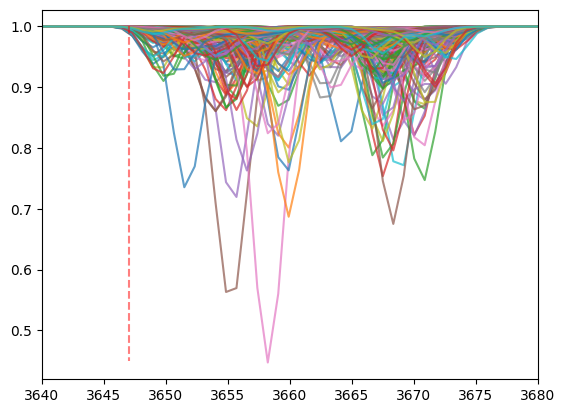

In [12]:
import matplotlib.pyplot as plt
for i in range(1000):
    plt.plot(wave, flux[i], alpha=0.7)

plt.plot([Ly_alpha_z, Ly_alpha_z], [1.0, 0.45], c="red", linestyle="--", alpha=0.5)
# plt.plot([Ly_beta_z, Ly_beta_z], [1.0, 0.5], c="blue")
plt.xlim([3640, 3680])
plt.show()

In [16]:
temet.plot.spectrum.spectra_gallery_indiv(sim, ion='H I', instrument='SDSS-BOSS', nRaysPerDim=100, EW_minmax=[1.0,10.0], xlim=[3640,3680])

Increaing dv_window = 1000.0 to 3680 km/s to cover requested xlim.
[H I] [SDSS-BOSS] Found [320] of [10000] spectra in EW range [1.0-10.0] Ang.
